<a href="https://colab.research.google.com/github/dqz22/Desafio_Extra_Senai/blob/main/Desafio_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando o arquivo CSV para o Google Colab

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv ('/content/drive/MyDrive/Analise de Dados/Senai/titanic_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Entendendo melhor o banco de dados, quantidade de linhas e colunas, se existem valores nulos (NaN)

print(df.head())
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(df.tail())
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(df.info())
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(df.describe())
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(df.shape)
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(df.dtypes)
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
- 

In [ ]:
# Verificando o numero de linhas duplicadas
linhas_duplicadas = df[df.duplicated()]
print(len(linhas_duplicadas))

0


In [ ]:
# Verificando os valores nulos no banco de dados

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Calculando a mediana das idades

age_mediana = df['Age'].median()
age_mediana

28.0

In [ ]:
# Substituindo os valores nulos na coluna 'Age' pela mediana
#df['Age'].fillna(age_mediana, inplace=True)
df.fillna({'Age':age_mediana}, inplace=True)

In [ ]:
# Substituindo os demais valores nulos por '0'
df['Cabin'].fillna(0, inplace=True)
df['Embarked'].fillna(0, inplace=True)

In [ ]:
# Conferindo se os valores nulos foram substituidos corretamente
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Verificando a quantidade de sobreviventes

sobreviventes = df.groupby(['Survived']).size()
sobreviventes


,0
Survived,
0,549
1,342


In [ ]:
# Verificando o percentual de sobreviventes

percentual = (df.groupby('Survived').size() / len(df)) * 100
percentual

,0
Survived,
0,61.616162
1,38.383838


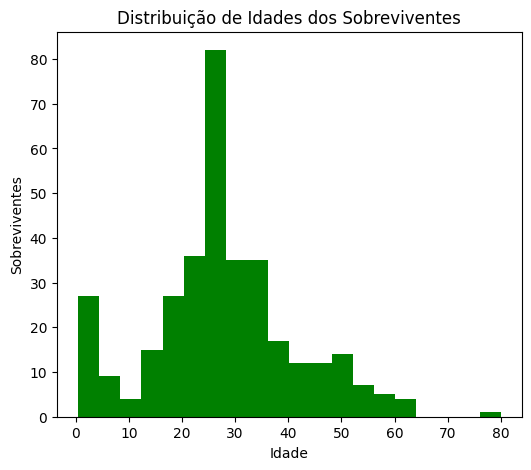

In [ ]:
# Analisando os sobreviventes pela idade

sobreviventes_idade = df[df['Survived']==1]
plt.figure(figsize=(6,5))
plt.hist(sobreviventes_idade['Age'], bins=20, color='green')
plt.title('Distribuição de Idades dos Sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Sobreviventes')
plt.show()

In [ ]:
#Verificando a quantidade de sobreviventes pela idade

faixa = [0, 10, 20, 30, 40, 50, 60, 70, 80]
rotulo = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['Faixa_Etaria'] = pd.cut(df['Age'], bins=faixa, labels=rotulo)
contagem_idade = pd.crosstab(df['Faixa_Etaria'], df['Survived'])
contagem_idade.columns = ['Não Sobreviveu', 'Sobreviveu']
contagem_idade


,Não Sobreviveu,Sobreviveu
Faixa_Etaria,,
0-10,26,38
11-20,71,44
21-30,271,136
31-40,86,69
41-50,53,33
51-60,25,17
61-70,13,4
71-80,4,1


In [ ]:
# Verificando o percentual de sobreviventes pela idade

percentual_idade = pd.crosstab(df['Faixa_Etaria'], df['Survived'], normalize='index') * 100
percentual_idade.columns = ['% Não Sobreviveu', '% Sobreviveu']
percentual_idade

,% Não Sobreviveu,% Sobreviveu
Faixa_Etaria,,
0-10,40.625000,59.375000
11-20,61.739130,38.260870
21-30,66.584767,33.415233
31-40,55.483871,44.516129
41-50,61.627907,38.372093
51-60,59.523810,40.476190
61-70,76.470588,23.529412
71-80,80.000000,20.000000


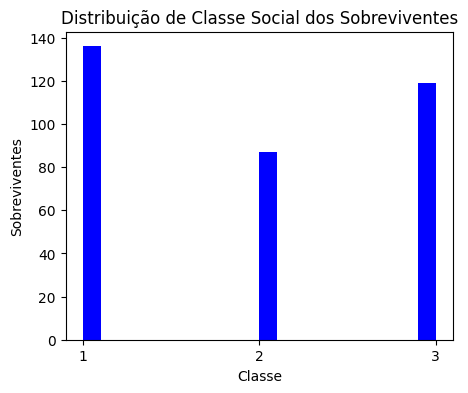

In [ ]:
# Analisando os sobreviventes pela classe social

sobreviventes_classe = df[df['Survived']==1]
plt.figure(figsize=(5,4))
plt.hist(sobreviventes_classe['Pclass'], bins=20, color='blue')
plt.title('Distribuição de Classe Social dos Sobreviventes')
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.xticks([1, 2, 3])
plt.show()

In [ ]:
#Verificando o percentual de sobreviventes por classe

percentual_classe = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
percentual_classe

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [ ]:
quantidade_classe = pd.crosstab(df['Pclass'], df['Survived'])
quantidade_classe

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


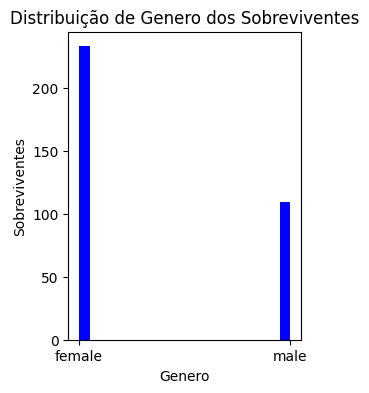

In [ ]:
# Analisando os sobreviventes pela genero

sobreviventes_genero = df[df['Survived']==1]
plt.figure(figsize=(3,4))
plt.hist(sobreviventes_genero['Sex'], bins=20, color='blue')
plt.title('Distribuição de Genero dos Sobreviventes')
plt.xlabel('Genero')
plt.ylabel('Sobreviventes')
plt.show()

In [ ]:
#Verificando o percentual de sobreviventes por genero

percentual_genero = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
percentual_genero

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [ ]:
#Verificando quantidade de sobreviventes por genero

quantidade_genero = pd.crosstab(df['Sex'], df['Survived'])
quantidade_genero

Survived,0,1
Sex,,
female,81,233
male,468,109


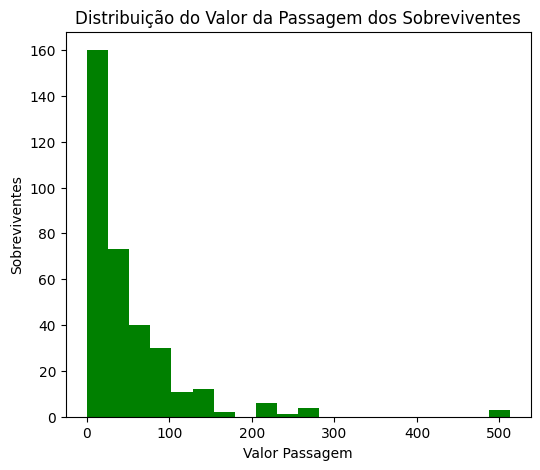

In [ ]:
# Analisando os sobreviventes pelo valor da passagem pago

sobreviventes_passagem = df[df['Survived']==1]
plt.figure(figsize=(6,5))
plt.hist(sobreviventes_passagem['Fare'], bins=20, color='green')
plt.title('Distribuição do Valor da Passagem dos Sobreviventes')
plt.xlabel('Valor Passagem')
plt.ylabel('Sobreviventes')
plt.show()

In [ ]:
#Verificando o percentual de sobreviventes por valor pago na passagem

faixa = [0, 50, 100, 150, 200, 300, 600]
rotulo = ['0-50', '51-100', '101-150', '151-200', '201-300', '300+']
df['Faixa_Preco'] = pd.cut(df['Fare'], bins=faixa, labels=rotulo)
percentual_fare = pd.crosstab(df['Faixa_Preco'], df['Survived'], normalize='index') * 100
percentual_fare

Survived,0,1
Faixa_Preco,,
0-50,67.597765,32.402235
51-100,34.579439,65.420561
101-150,20.833333,79.166667
151-200,33.333333,66.666667
201-300,35.294118,64.705882
300+,0.000000,100.000000


In [ ]:
#Verificando a quantidade de sobreviventes por valor pago na passagem

contagem_fare = pd.crosstab(df['Faixa_Preco'], df['Survived'])
contagem_fare.columns = ['Não Sobreviveu', 'Sobreviveu']
contagem_fare

,Não Sobreviveu,Sobreviveu
Faixa_Preco,,
0-50,484,232
51-100,37,70
101-150,5,19
151-200,3,6
201-300,6,11
300+,0,3


In [ ]:
# Explorando mais os dados obtidos (sobreviventes x idade x genero)

percentual_idade_genero = pd.crosstab([df['Faixa_Etaria'], df['Sex']], df['Survived'],normalize='index') * 100
percentual_idade_genero.columns = ['% Não Sobreviveu', '% Sobreviveu']
percentual_idade_genero

% Não Sobreviveu  % Sobreviveu
Faixa_Etaria Sex                                   
0-10         female         38.709677     61.290323
             male           42.424242     57.575758
11-20        female         26.086957     73.913043
             male           85.507246     14.492754
21-30        female         27.611940     72.388060
             male           85.714286     14.285714
31-40        female         16.363636     83.636364
             male           77.000000     23.000000
41-50        female         32.258065     67.741935
             male           78.181818     21.818182
51-60        female          7.142857     92.857143
             male           85.714286     14.285714
61-70        female          0.000000    100.000000
             male           92.857143      7.142857
71-80        male           80.000000     20.000000

In [ ]:
# Explorando mais os dados obtidos (sobreviventes x idade x genero x classe)

percentual_idade_genero = pd.crosstab([df['Faixa_Etaria'],df['Pclass'], df['Sex']], df['Survived'],normalize='index') * 100
percentual_idade_genero.columns = ['% Não Sobreviveu', '% Sobreviveu']
percentual_idade_genero

% Não Sobreviveu  % Sobreviveu
Faixa_Etaria Pclass Sex                                   
0-10         1      female        100.000000      0.000000
                    male            0.000000    100.000000
             2      female          0.000000    100.000000
                    male            0.000000    100.000000
             3      female         50.000000     50.000000
                    male           63.636364     36.363636
11-20        1      female          0.000000    100.000000
                    male           60.000000     40.000000
             2      female          0.000000    100.000000
                    male           90.000000     10.000000
             3      female         48.000000     52.000000
                    male           87.037037     12.962963
21-30        1      female          3.333333     96.666667
                    male           65.000000     35.000000
             2      female         10.000000     90.000000
                    male           95.238095      4.761905
             3      female         44.594595     55.405405
                    male           87.958115     12.041885
31-40        1      female          0.000000    100.000000
                    male           48.000000     52.000000
             2      female          5.882353     94.117647
                    male           88.461538     11.538462
             3      female         57.142857     42.857143
                    male           85.714286     14.285714
41-50        1      female          7.692308     92.307692
                    male           62.500000     37.500000
             2      female         10.000000     90.000000
                    male           88.888889     11.111111
             3      female        100.000000      0.000000
                    male           90.909091      9.090909
51-60        1      female          0.000000    100.000000
                    male           71.428571     28.571429
             2      female         33.333333     66.666667
                    male          100.000000      0.000000
             3      male          100.000000      0.000000
61-70        1      female          0.000000    100.000000
                    male          100.000000      0.000000
             2      male           66.666667     33.333333
             3      female          0.000000    100.000000
                    male          100.000000      0.000000
71-80        1      male           66.666667     33.333333
             3      male          100.000000      0.000000

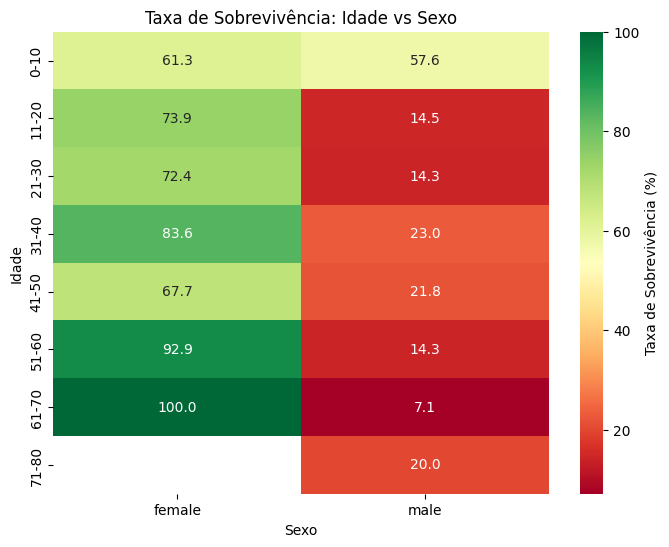

In [ ]:
# 1. Transformamos a tabela: pegamos apenas a coluna de sobrevivência e desempilhamos o sexo
# Isso cria uma matriz onde as linhas são as Classes e as colunas são o Sexo
matriz_idade_genero = percentual_idade_genero['% Sobreviveu'].unstack()

# 2. Criamos o Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_idade_genero,
            annot=True,      # Mostra a porcentagem dentro do quadrado
            fmt=".1f",       # Formata com 1 casa decimal
            cmap="RdYlGn",   # Verde para alta sobrevivência, Vermelho para baixa
            cbar_kws={'label': 'Taxa de Sobrevivência (%)'})

plt.title('Taxa de Sobrevivência: Idade vs Sexo')
plt.ylabel('Idade')
plt.xlabel('Sexo')
plt.show()

In [ ]:
# Explorando mais os dados obtidos (sobreviventes x classe x genero)

percentual_classe_genero = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'],normalize='index') * 100
percentual_classe_genero.columns = ['% Não Sobreviveu', '% Sobreviveu']
percentual_classe_genero

% Não Sobreviveu  % Sobreviveu
Pclass Sex                                   
1      female          3.191489     96.808511
       male           63.114754     36.885246
2      female          7.894737     92.105263
       male           84.259259     15.740741
3      female         50.000000     50.000000
       male           86.455331     13.544669

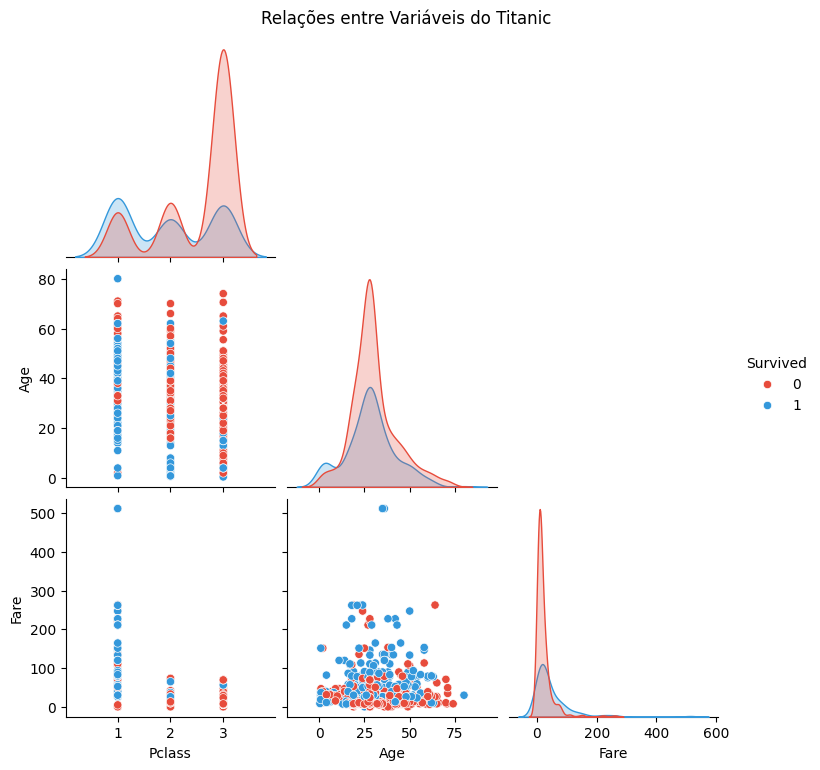

In [ ]:
# Verificando as cinco variaveis analisadas (Sobreviventes x Idade x Genero x Classe x Valor pago na passagem)

df_para_plot = df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']].copy()
sns.pairplot(df_para_plot, hue='Survived', palette=['#e74c3c', '#3498db'], corner=True)
plt.suptitle('Relações entre Variáveis do Titanic', y=1.02)
plt.show()